<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/10_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install statsmodels

In [3]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [ ]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='titanic')
df.head(20)

In [ ]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")
df =df.fillna(method="bfill")

In [8]:

#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: title={'center': 'fare'}, xlabel='pclass'>

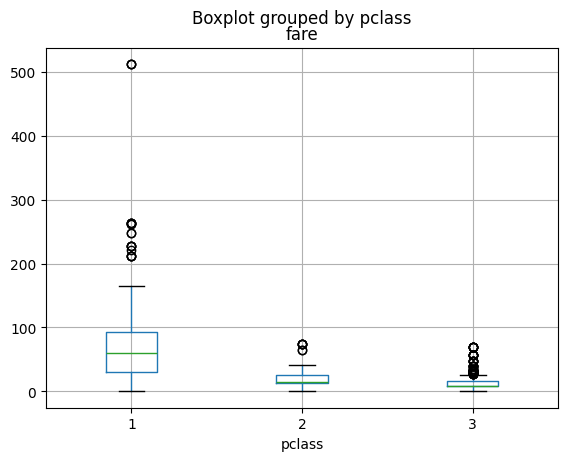

In [17]:
#Analizamos los diagrama de caja de la variable objetivo "tarifa" por cada categoria 
# de la variable independiente "sex"
df.boxplot("fare", by= "pclass")

In [10]:
#Obtengo las categorías de la variable (sex)
grupos=pd.unique(df['sex'].values)
grupos

array(['male', 'female'], dtype=object)

**SCIPY ONEWAY (ANOVA)**

In [12]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna sex: "male" y "female" 
Fare_1= df.fare[df.sex=='male']
Fare_2= df.fare[df.sex=='female']


In [14]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable 
# cuantitativa
anova= stats.f_oneway(Fare_1, Fare_2)
anova

F_onewayResult(statistic=np.float64(30.57139211854278), pvalue=np.float64(4.230867870041279e-08))

**STATESMODELS (ANOVA)**

In [16]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('fare ~ sex', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

             df        sum_sq       mean_sq          F        PR(>F)
sex         1.0  7.306640e+04  73066.397308  30.571392  4.230868e-08
Residual  889.0  2.124732e+06   2390.025192        NaN           NaN


In [24]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('fare ~ sex + pclass + sex:pclass', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

               df        sum_sq        mean_sq           F        PR(>F)
sex           1.0  7.306640e+04   73066.397308   44.352450  4.805283e-11
pclass        1.0  6.175508e+05  617550.791669  374.863021  6.244332e-70
sex:pclass    1.0  4.593437e+04   45934.370325   27.882884  1.621976e-07
Residual    887.0  1.461247e+06    1647.403871         NaN           NaN
